# **Apple Stock Forcasting**


In [3]:
!pip install jovian --upgrade --quiet

In [4]:
import jovian

In [5]:
# Execute this to save new versions of the notebook
jovian.commit(project="apple-stock-forcasting")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nikhilpatil3586/apple-stock-forcasting


'https://jovian.ai/nikhilpatil3586/apple-stock-forcasting'

In [6]:
!pip install yfinance --quiet

     |████████████████████████████████| 6.3 MB 6.0 MB/s 


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import fix_yahoo_finance as yf
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
warnings.filterwarnings('ignore')

### APPLE Stock Price Forecasting
 For this dataset, we are using the LSTM Recurrent Neural Network for predicting the future stock prices of APPLE. Our aim is to predict stock prices for a few days, which is a time series problem. The LSTM model is very popular in time-series forecasting, and this is the reason why this model is chosen in this task. The historical prices of APPLE are collected automatically using the yfinance library of python. We have used 21 years of historical price data, from 01.01.2001 to 26.07.2021.

This data set contains 5172 observations with OHLC (Open, High, Low, Close) columns, a total of 7 columns. The LSTM model is trained on 'Close' column. We will split data for the testing purpose. The stock prices for this testing data will be predicted by the already trained LSTM model, and the predicted prices will be plotted against the original prices to visualise the model’s accuracy.

We will fetch 21 years of historical prices of APPLE from 01.01.2001 to 26.07.2021. So we need to set the start and end dates and pass these parameters to the function for fetching the data.


In [8]:
# Import yfinance package
import yfinance as yf

# Step-1 We will set the start_date & end_date of stock
start_date = '2001-01-01'
end_date = '2021-07-26'

# Step-2 Now we will set ticker name(Stock name) as 'AAPL'
ticker = 'AAPL'

# Step-3 We will download/fetch the 'APPLE' stock data 
data = yf.download(ticker, start_date, end_date)

#Step 4- Look at the last 5 rows of the stock
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-19,143.750000,144.070007,141.669998,142.449997,142.236893,121434600
2021-07-20,143.460007,147.100006,142.960007,146.149994,145.931351,96350000
2021-07-21,145.529999,146.130005,144.630005,145.399994,145.182480,74993500
2021-07-22,145.940002,148.199997,145.809998,146.800003,146.580383,77338200
2021-07-23,147.550003,148.720001,146.919998,148.559998,148.337753,71447400


In [9]:
# Print the first five rows of the "APPLE" stock
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,0.228070,452312000
2001-01-03,0.258929,0.297991,0.257813,0.292411,0.251069,817073600
2001-01-04,0.323940,0.330357,0.300223,0.304688,0.261610,739396000
2001-01-05,0.302455,0.310268,0.286830,0.292411,0.251069,412356000
2001-01-08,0.302455,0.303292,0.284598,0.295759,0.253944,373699200


In [10]:
# Let us print the shape of the data(number of rows & columns)
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  5172
Number of columns:  6


In [11]:
data.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,0.265625,0.272321,0.260045,0.265625,0.228070,452312000
1,2001-01-03,0.258929,0.297991,0.257813,0.292411,0.251069,817073600
2,2001-01-04,0.323940,0.330357,0.300223,0.304688,0.261610,739396000
3,2001-01-05,0.302455,0.310268,0.286830,0.292411,0.251069,412356000
4,2001-01-08,0.302455,0.303292,0.284598,0.295759,0.253944,373699200
...,...,...,...,...,...,...,...
5167,2021-07-19,143.750000,144.070007,141.669998,142.449997,142.236893,121434600
5168,2021-07-20,143.460007,147.100006,142.960007,146.149994,145.931351,96350000
5169,2021-07-21,145.529999,146.130005,144.630005,145.399994,145.182480,74993500
5170,2021-07-22,145.940002,148.199997,145.809998,146.800003,146.580383,77338200


In [12]:
# Now we are forcasting the price on 'Close' column. SO we will select Date & that column only.
data1 = data.reset_index()[['Date', 'Close']]

In [13]:
data1

,Date,Close
0,2001-01-02,0.265625
1,2001-01-03,0.292411
2,2001-01-04,0.304688
3,2001-01-05,0.292411
4,2001-01-08,0.295759
...,...,...
5167,2021-07-19,142.449997
5168,2021-07-20,146.149994
5169,2021-07-21,145.399994
5170,2021-07-22,146.800003


In [14]:
# Let us visualize the stock price at the time of 'Close'
fig = px.line(data1, x= 'Date', y = 'Close', title = 'Closing Price Of APPLE Stock')

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
                        dict(count = 1, label = '1Yr', step = 'year', stepmode = 'backward'),
                        dict(count = 2, label = '3Yr', step = 'year', stepmode = 'backward'),
                        dict(count = 3, label = '5Yr', step = 'year', stepmode = 'backward'),
                        dict(step = 'all')
        ])
    )
)
fig.show()

In [15]:
df = data['Close']

After getting values from the "Close" column, we need to sccale them.
We will use sklearn library for sclaing the values.

In [16]:
# Normalizing data, scale between 0 and 1:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [17]:
scaled_df

array([[2.10447945e-04],
       [3.90321511e-04],
       [4.72764172e-04],
       ...,
       [9.74817969e-01],
       [9.84219322e-01],
       [9.96038052e-01]])

In [18]:
# Now we will split the data 
training_size = int(len(scaled_df) * 0.80)
test_size = len(scaled_df) - training_size

In [19]:
train_data, test_data = scaled_df[0:training_size,:], scaled_df[training_size:len(scaled_df),:1]

In [20]:
training_size, test_size

(4137, 1035)

In [21]:
def create_dataset(dataset, time_step=1):
  xtrain = []
  ytrain = []
  for i in range(len(dataset) - time_step-1):
    a = dataset[i:(i+time_step), 0]
    xtrain.append(a)
    ytrain.append(dataset[i + time_step, 0])
  return np.array(xtrain), np.array(ytrain)  

In [22]:
# Let us define the time_steps
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [23]:
print(x_train.shape, y_train.shape)

(4036, 100) (4036,)


In [24]:
print(x_test.shape, y_test.shape)

(934, 100) (934,)


In [25]:
# Now reshape the inputs to(samples, time_steps, features) which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [26]:
# Building Model
model = Sequential()

# Adding first LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100, return_sequences=True, input_shape = (x_train.shape[1], 1)))

# Adding Second LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units= 100, return_sequences=True))

# Adding third LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units = 100, return_sequences=True))

# Adding third LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units = 100, return_sequences=True))

# Adding forth LSTM layer 
model.add(LSTM(units = 100))

# Adding output layer
model.add(Dense(1))

# Compiling the LSTM model
model.compile(loss = 'mean_squared_error', optimizer= 'adam')

In [27]:
# Let us look at the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 362,501
Trainable params: 362,501
Non-trainable params: 0
__________________________________________________

In [28]:
# Fitting the LSTM to the Training set
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=100, verbose=1)

Epoch 1/100
41/41 [==============================] - 21s 217ms/step - loss: 9.7292e-04 - val_loss: 0.0073
Epoch 2/100
41/41 [==============================] - 7s 173ms/step - loss: 3.9163e-05 - val_loss: 0.0058
Epoch 3/100
41/41 [==============================] - 7s 169ms/step - loss: 3.6017e-05 - val_loss: 0.0064
Epoch 4/100
41/41 [==============================] - 7s 161ms/step - loss: 3.6103e-05 - val_loss: 0.0051
Epoch 5/100
41/41 [==============================] - 6s 151ms/step - loss: 3.5826e-05 - val_loss: 0.0050
Epoch 6/100
41/41 [==============================] - 6s 149ms/step - loss: 4.9844e-05 - val_loss: 0.0080
Epoch 7/100
41/41 [==============================] - 6s 145ms/step - loss: 4.2482e-05 - val_loss: 0.0042
Epoch 8/100
41/41 [==============================] - 6s 140ms/step - loss: 3.2371e-05 - val_loss: 0.0035
Epoch 9/100
41/41 [==============================] - 6s 138ms/step - loss: 2.8766e-05 - val_loss: 0.0056
Epoch 10/100
41/41 [==============================] - 

In [29]:
# Let us prediction on train model & check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [30]:
# Transformation to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [31]:
#
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

14.915583064011166

In [32]:
math.sqrt(mean_squared_error(y_test, test_predict))

75.42446708642692

In [33]:
print(len(train_predict))
print(len(df))

4036
5172


But before plot our predictions, we need to make a inverse_transform() in the predictions array, because we make predictions using the Scale, so our predictions are between 0 and 1.


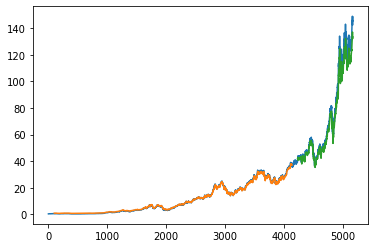

In [34]:
lock_back = 100
train_predict_plot = np.empty_like(scaled_df)
train_predict_plot[:, :] = np.nan
train_predict_plot[lock_back:len(train_predict)+lock_back,:] = train_predict

# Shift test prediction for plotting
test_predict_plot = np.empty_like(scaled_df)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+ (lock_back*2)+1:len(scaled_df)-1,:] = test_predict

# Plot basline & prediction
plt.plot(scaler.inverse_transform(scaled_df))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [35]:
len(test_data)

1035

In [36]:
x_input = test_data[935:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist() 

In [38]:
# Let us do Prediction for next 30 days
lst_output = []
n_steps = 100
i = 0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    # print(temp_input)
    lst_output.extend(yhat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose = 0)
    print(yhat)
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i+1  

[[0.9093134]]
101
1 day input [0.80512468 0.8137873  0.77980836 0.81157127 0.80411744 0.81741352
 0.81116837 0.83104539 0.84165543 0.83621612 0.80781077 0.80418455
 0.82701627 0.82130835 0.80485606 0.80821367 0.81237711 0.81358585
 0.80358021 0.81868943 0.82439734 0.84387146 0.84595316 0.85730187
 0.87382128 0.89154943 0.8797307  0.90115213 0.88503567 0.90162224
 0.89933909 0.90390539 0.8922881  0.89490703 0.88443132 0.90041355
 0.90309959 0.90088356 0.89544426 0.8947727  0.88120805 0.88846039
 0.85696609 0.85864495 0.86965788 0.87281404 0.85025089 0.84393862
 0.82285282 0.83762631 0.85428    0.84635605 0.83682047 0.83574606
 0.85333987 0.8407153  0.85192969 0.85058667 0.85025089 0.83970801
 0.83520883 0.8329928  0.83823066 0.82802356 0.84380429 0.84387146
 0.84951221 0.85213114 0.84528165 0.85360849 0.87462707 0.86898632
 0.87241104 0.88342398 0.87449284 0.8868488  0.8981303  0.89625005
 0.89430269 0.8922881  0.90350249 0.91391108 0.9181417  0.92022339
 0.93828732 0.95212063 0.9692444

In [39]:
new_day = np.arange(1,101)
pred_day = np.arange(101,131)

In [40]:
df1 = scaled_df.tolist()
df1.extend(lst_output)

In [41]:
len(scaled_df)

5172

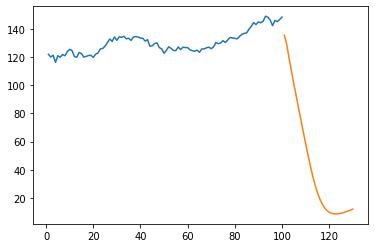

In [42]:
plt.plot(new_day, scaler.inverse_transform(scaled_df[5072:]))
plt.plot(pred_day, scaler.inverse_transform(lst_output))

In [43]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nikhilpatil3586/apple-stock-forcasting


'https://jovian.ai/nikhilpatil3586/apple-stock-forcasting'